In [1]:
import numpy as np
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import xarray as xr
import xgcm
import gsw
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
plt.rcParams['font.size']=14
import cmasher as cmr
import matplotlib.colors as mcolors

In [2]:
def fix_dimension(ds, bad_dim, new_dim, trim=True):
    assert len(ds[bad_dim]) == (len(ds[new_dim]) + 1)
    if trim and (len(ds[bad_dim]) == (len(ds[new_dim]) + 1)):
        ds = ds.isel(**{bad_dim: slice(0,-1)})
        assert len(ds[bad_dim]) == len(ds[new_dim])
    swapped_vars = []
    for v in ds:
        # replace naughty dimension
        dims = list(ds[v].dims)
        if bad_dim in dims:
            idx = dims.index(bad_dim)
            dims[idx] = new_dim
            ds[v].variable.dims = dims
            swapped_vars.append(v)
    return ds, swapped_vars

def reset_dimensions(ds, orig_dim, new_dim, *reset_vars):
    for v in reset_vars:
        dims = list(ds[v].dims)
        if new_dim in dims:
            idx = dims.index(new_dim)
            dims[idx] = orig_dim
            ds[v].variable.dims = dims
    # reindexing necessary to figure out new dims
    return ds.reindex()

def open_mncdataset(fname_base, ntiles_y, ntiles_x, iternum=None):
    if iternum is not None:
        itersuf = '.%010d' % iternum
    else:
        itersuf = ''
    dsets_y = []
    for ny in range(ntiles_y):
        dsets_x = []
        swap_vars = set()
        for nx in range(ntiles_x):
            ntile = nx + ntiles_x*ny + 1
            fname = fname_base + '%s.t%03d.nc' % (itersuf, ntile)
            ds = xr.open_dataset(fname)
            ds, swapped_vars_x = fix_dimension(ds, 'Xp1', 'X')    
            ds = ds.chunk()
            dsets_x.append(ds)
        ds_xconcat = xr.concat(dsets_x, 'X')
        ds_xconcat, swapped_vars_y = fix_dimension(ds_xconcat, 'Yp1', 'Y')
        dsets_y.append(ds_xconcat)
    ds = xr.concat(dsets_y, 'Y')
    ds = reset_dimensions(ds, 'Xp1', 'X', *swapped_vars_x)
    ds = reset_dimensions(ds, 'Yp1', 'Y', *swapped_vars_y)
    return ds



In [3]:

# add meridional gradient to equal stratficiation; thermal wind balanced
dss = open_mncdataset('run_bump5000_20layerswdTdy_tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_tw_withoutGM/grid', 2, 3, None)
dsb2t=xr.merge((dss,dsg))
dsb2t=dsb2t.isel(Zp1=slice(0,-1))
dsb2t['Z']=-1*dsb2t.Z
dsb2t['Zl']=-1*dsb2t.Zl
dsb2t=dsb2t.rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2t = xgcm.generate_grid_ds(dsb2t, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2t.coords['day']=dsb2t.T/(24*3600)
dsb2t.coords['month']=dsb2t.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u01tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u01tw_withoutGM/grid', 2, 3, None)
dsb2tu010=xr.merge((dss,dsg))
dsb2tu010=dsb2tu010.isel(Zp1=slice(0,-1))
dsb2tu010['Z']=-1*dsb2tu010.Z
dsb2tu010['Zl']=-1*dsb2tu010.Zl
dsb2tu010=dsb2tu010.rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu010=xgcm.generate_grid_ds(dsb2tu010, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu010.coords['day']=dsb2tu010.T/(24*3600)
dsb2tu010.coords['month']=dsb2tu010.day/30

In [4]:
# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u001tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u001tw_withoutGM/grid', 2, 3, None)
dsb2tu001=xr.merge((dss,dsg))
dsb2tu001['Z']=-1*dsb2tu001.Z
dsb2tu001['Zl']=-1*dsb2tu001.Zl
dsb2tu001=dsb2tu001.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu001=xgcm.generate_grid_ds(dsb2tu001, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu001.coords['day']=dsb2tu001.T/(24*3600)
dsb2tu001.coords['month']=dsb2tu001.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u002tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u002tw_withoutGM/grid', 2, 3, None)
dsb2tu002=xr.merge((dss,dsg))
dsb2tu002['Z']=-1*dsb2tu002.Z
dsb2tu002['Zl']=-1*dsb2tu002.Zl
dsb2tu002=dsb2tu002.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu002=xgcm.generate_grid_ds(dsb2tu002, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu002.coords['day']=dsb2tu002.T/(24*3600)
dsb2tu002.coords['month']=dsb2tu002.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u005tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u005tw_withoutGM/grid', 2, 3, None)
dsb2tu005=xr.merge((dss,dsg))
dsb2tu005['Z']=-1*dsb2tu005.Z
dsb2tu005['Zl']=-1*dsb2tu005.Zl
dsb2tu005=dsb2tu005.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu005=xgcm.generate_grid_ds(dsb2tu005, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu005.coords['day']=dsb2tu005.T/(24*3600)
dsb2tu005.coords['month']=dsb2tu005.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u008tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u008tw_withoutGM/grid', 2, 3, None)
dsb2tu008=xr.merge((dss,dsg))
dsb2tu008['Z']=-1*dsb2tu008.Z
dsb2tu008['Zl']=-1*dsb2tu008.Zl
dsb2tu008=dsb2tu008.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu008=xgcm.generate_grid_ds(dsb2tu008, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu008.coords['day']=dsb2tu008.T/(24*3600)
dsb2tu008.coords['month']=dsb2tu008.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u012tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u012tw_withoutGM/grid', 2, 3, None)
dsb2tu012=xr.merge((dss,dsg))
dsb2tu012['Z']=-1*dsb2tu012.Z
dsb2tu012['Zl']=-1*dsb2tu012.Zl
dsb2tu012=dsb2tu012.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu012=xgcm.generate_grid_ds(dsb2tu012, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu012.coords['day']=dsb2tu012.T/(24*3600)
dsb2tu012.coords['month']=dsb2tu012.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u015tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u015tw_withoutGM/grid', 2, 3, None)
dsb2tu015=xr.merge((dss,dsg))
dsb2tu015['Z']=-1*dsb2tu015.Z
dsb2tu015['Zl']=-1*dsb2tu015.Zl
dsb2tu015=dsb2tu015.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu015=xgcm.generate_grid_ds(dsb2tu015, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu015.coords['day']=dsb2tu015.T/(24*3600)
dsb2tu015.coords['month']=dsb2tu015.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u018tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u018tw_withoutGM/grid', 2, 3, None)
dsb2tu018=xr.merge((dss,dsg))
dsb2tu018['Z']=-1*dsb2tu018.Z
dsb2tu018['Zl']=-1*dsb2tu018.Zl
dsb2tu018=dsb2tu018.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu018=xgcm.generate_grid_ds(dsb2tu018, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu018.coords['day']=dsb2tu018.T/(24*3600)
dsb2tu018.coords['month']=dsb2tu018.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u020tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u020tw_withoutGM/grid', 2, 3, None)
dsb2tu020=xr.merge((dss,dsg))
dsb2tu020['Z']=-1*dsb2tu020.Z
dsb2tu020['Zl']=-1*dsb2tu020.Zl
dsb2tu020=dsb2tu020.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu020=xgcm.generate_grid_ds(dsb2tu020, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu020.coords['day']=dsb2tu020.T/(24*3600)
dsb2tu020.coords['month']=dsb2tu020.day/30

# add to thermal wind a barotropic inflow condition
dss = open_mncdataset('run_bump5000_20layerswdTdy_u025tw_withoutGM/state', 2, 3, 0)
dsg = open_mncdataset('run_bump5000_20layerswdTdy_u025tw_withoutGM/grid', 2, 3, None)
dsb2tu025=xr.merge((dss,dsg))
dsb2tu025['Z']=-1*dsb2tu025.Z
dsb2tu025['Zl']=-1*dsb2tu025.Zl
dsb2tu025=dsb2tu025.isel(Zp1=slice(0,-1)).rename_dims({'Xp1':'X_left','Yp1':'Y_left','Zp1':'Z_left'})
dsb2tu025=xgcm.generate_grid_ds(dsb2tu025, {'X':'X', 'Y':'Y', 'Z':'Z'})
dsb2tu025.coords['day']=dsb2tu025.T/(24*3600)
dsb2tu025.coords['month']=dsb2tu025.day/30



In [5]:
dsb2t['drU']=dsb2t.U.isel(T=0)*0+dsb2t.drF.isel(X=30,Y=20)
dsb2t['drV']=dsb2t.V.isel(T=0)*0+dsb2t.drF.isel(X=30,Y=20)
metrics = {
    ('X',): ['dxC', 'dxG', 'dxV'], # X distances
    ('Y',): ['dyC', 'dyG', 'dyU'], # Y distances
    ('Z',): ['drC', 'drF', 'drU', 'drV'], # Z distances
    }
grid = xgcm.Grid(dsb2t, periodic=False, metrics=metrics)

In [6]:
theta_target =np.array([4.75])
dep475_b2t=grid.transform(dsb2t.Z.broadcast_like(dsb2t.Temp),'Z',theta_target,target_data=dsb2t.Temp)
dep475_b2tu001=grid.transform(dsb2tu001.Z.broadcast_like(dsb2tu001.Temp),'Z',theta_target,target_data=dsb2tu001.Temp)
dep475_b2tu002=grid.transform(dsb2tu002.Z.broadcast_like(dsb2tu002.Temp),'Z',theta_target,target_data=dsb2tu002.Temp)
dep475_b2tu005=grid.transform(dsb2tu005.Z.broadcast_like(dsb2tu005.Temp),'Z',theta_target,target_data=dsb2tu005.Temp)
dep475_b2tu008=grid.transform(dsb2tu008.Z.broadcast_like(dsb2tu008.Temp),'Z',theta_target,target_data=dsb2tu008.Temp)
dep475_b2tu010=grid.transform(dsb2tu010.Z.broadcast_like(dsb2tu010.Temp),'Z',theta_target,target_data=dsb2tu010.Temp)
dep475_b2tu012=grid.transform(dsb2tu012.Z.broadcast_like(dsb2tu012.Temp),'Z',theta_target,target_data=dsb2tu012.Temp)
dep475_b2tu015=grid.transform(dsb2tu015.Z.broadcast_like(dsb2tu015.Temp),'Z',theta_target,target_data=dsb2tu015.Temp)
dep475_b2tu018=grid.transform(dsb2tu018.Z.broadcast_like(dsb2tu018.Temp),'Z',theta_target,target_data=dsb2tu018.Temp)
dep475_b2tu020=grid.transform(dsb2tu020.Z.broadcast_like(dsb2tu020.Temp),'Z',theta_target,target_data=dsb2tu020.Temp)
dep475_b2tu025=grid.transform(dsb2tu025.Z.broadcast_like(dsb2tu025.Temp),'Z',theta_target,target_data=dsb2tu025.Temp)


In [7]:
theta_target =np.array([4.5])
dep450_b2t=grid.transform(dsb2t.Z.broadcast_like(dsb2t.Temp),'Z',theta_target,target_data=dsb2t.Temp)
dep450_b2tu001=grid.transform(dsb2tu001.Z.broadcast_like(dsb2tu001.Temp),'Z',theta_target,target_data=dsb2tu001.Temp)
dep450_b2tu002=grid.transform(dsb2tu002.Z.broadcast_like(dsb2tu002.Temp),'Z',theta_target,target_data=dsb2tu002.Temp)
dep450_b2tu005=grid.transform(dsb2tu005.Z.broadcast_like(dsb2tu005.Temp),'Z',theta_target,target_data=dsb2tu005.Temp)
dep450_b2tu008=grid.transform(dsb2tu008.Z.broadcast_like(dsb2tu008.Temp),'Z',theta_target,target_data=dsb2tu008.Temp)
dep450_b2tu010=grid.transform(dsb2tu010.Z.broadcast_like(dsb2tu010.Temp),'Z',theta_target,target_data=dsb2tu010.Temp)
dep450_b2tu012=grid.transform(dsb2tu012.Z.broadcast_like(dsb2tu012.Temp),'Z',theta_target,target_data=dsb2tu012.Temp)
dep450_b2tu015=grid.transform(dsb2tu015.Z.broadcast_like(dsb2tu015.Temp),'Z',theta_target,target_data=dsb2tu015.Temp)
dep450_b2tu018=grid.transform(dsb2tu018.Z.broadcast_like(dsb2tu018.Temp),'Z',theta_target,target_data=dsb2tu018.Temp)
dep450_b2tu020=grid.transform(dsb2tu020.Z.broadcast_like(dsb2tu020.Temp),'Z',theta_target,target_data=dsb2tu020.Temp)
dep450_b2tu025=grid.transform(dsb2tu025.Z.broadcast_like(dsb2tu025.Temp),'Z',theta_target,target_data=dsb2tu025.Temp)

(0.0, 1.0, 250000.0, 900000.0)

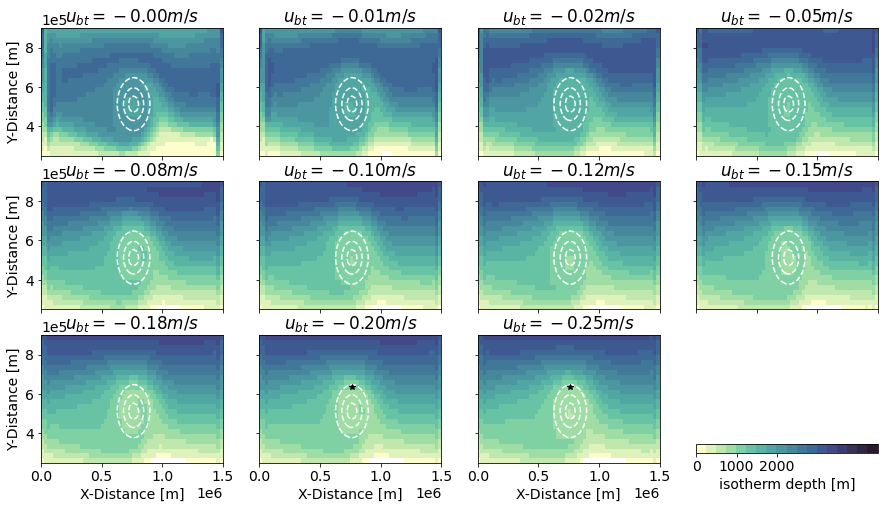

In [19]:
t=122
t0=0
dmin=0
dmax=4500
dlev=19
dmap=cmo.deep
fig,axes=plt.subplots(3,4,figsize=(15,8))

ax=axes[0,0]
(dep475_b2t.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.00m/s$')
ax=axes[0,1]
(dep475_b2tu001.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.01m/s$')
ax=axes[0,2]
(dep475_b2tu002.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.02m/s$')
ax=axes[0,3]
(dep475_b2tu005.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.05m/s$')
ax=axes[1,0]
(dep475_b2tu008.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.08m/s$')

ax=axes[1,1]
(dep475_b2tu010.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.10m/s$')
ax=axes[1,2]
(dep475_b2tu012.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.12m/s$')
ax=axes[1,3]
(dep475_b2tu015.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.15m/s$')
ax=axes[2,0]
(dep475_b2tu018.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.18m/s$')
ax=axes[2,1]
(dep475_b2tu020.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.20m/s$')
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=25),marker='*',color='k')
ax=axes[2,2]
cb=(dep475_b2tu025.isel(T=t,Temp=0)).plot.pcolormesh(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.25m/s$')
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=25),marker='*',color='k')
    
    

for i in range(0,4):
    axes[0,i].set_xticklabels('')
    axes[0,i].set_xlabel('')
    axes[1,i].set_xticklabels('')
    axes[1,i].set_xlabel('')
    axes[2,i].set_xlabel('X-Distance [m]')
    axes[0,i].set_ylim(0.25e6,.9e6)
    axes[1,i].set_ylim(0.25e6,.9e6)
    axes[2,i].set_ylim(0.25e6,.9e6)
    
    
for i in range(1,4):
    axes[0,i].set_yticklabels('')
    axes[1,i].set_yticklabels('')
    axes[2,i].set_yticklabels('')
    axes[0,i].set_ylabel('')
    axes[1,i].set_ylabel('') 
    axes[2,i].set_ylabel('')

axes[0,0].ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
axes[1,0].ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
axes[2,0].ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
axes[0,0].set_ylabel('Y-Distance [m]')
axes[1,0].set_ylabel('Y-Distance [m]')
axes[2,0].set_ylabel('Y-Distance [m]')

plt.colorbar(cb,ax=axes[2,3], orientation="horizontal", ticks=np.linspace(-2000,2000,5),label="isotherm depth [m]")
axes[2,3].axis('off')

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


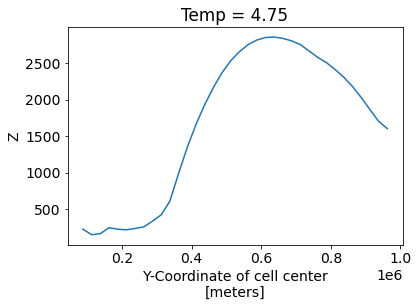

In [20]:
dep475_b2t.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'}).plot()

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out

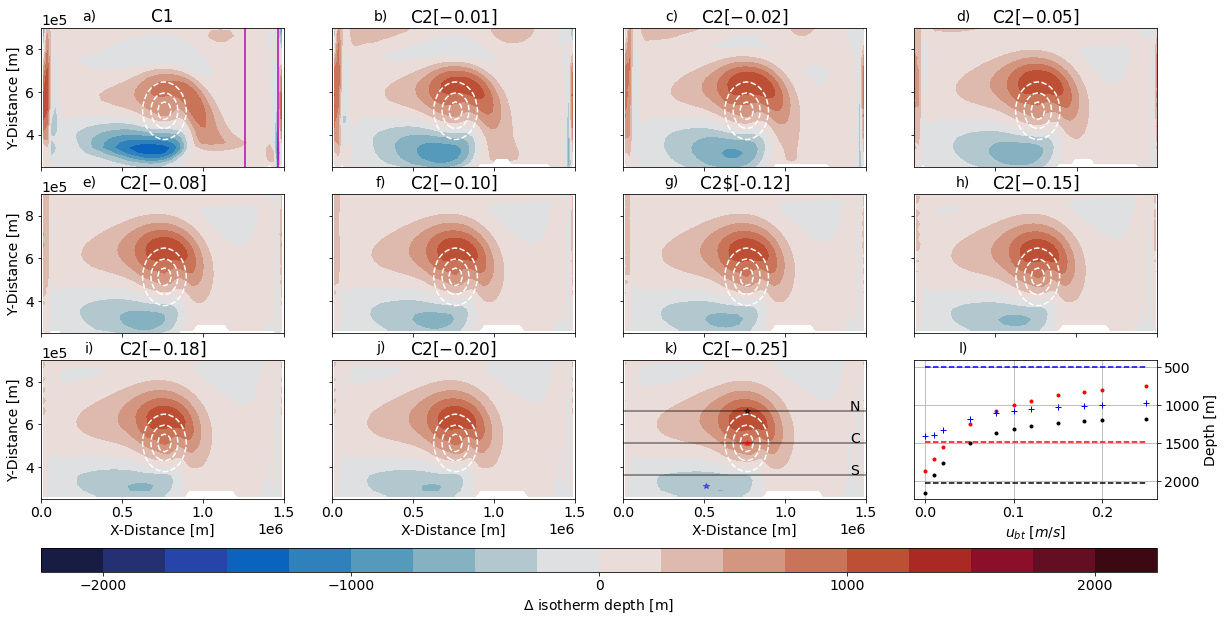

In [21]:
t=-1
t0=0

dmin=-2250
dmax=2250
dlev=19
dmap=cmo.balance
fig = plt.figure(figsize=(20,10))
gs = GridSpec(2,1, height_ratios=[1,0.05],wspace=.05)

gs1 = GridSpecFromSubplotSpec(3,4, subplot_spec=gs[0])
gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])


ax = fig.add_subplot(gs1[0,0])
(dep475_b2t.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2t.isel(Temp=0,T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dep475_b2tu001.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu001.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.01]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,2])
(dep475_b2tu002.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu002.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.02]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,3])
(dep475_b2tu005.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu005.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.05]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.text(0.2, 1.09, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,0])
(dep475_b2tu008.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu008.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.08]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,1])
(dep475_b2tu010.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu010.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,2])
(dep475_b2tu012.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu012.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.12]')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,3])
(dep475_b2tu015.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu015.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.15]$')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,0])
(dep475_b2tu018.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu018.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.18]$')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'i)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,1])
(dep475_b2tu020.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu020.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'j)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,2])
cb=(dep475_b2tu025.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu025.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.25]$')
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=26),marker='*',color='k',alpha=.5)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=20),marker='*',color='r',alpha=.5)
ax.plot(dsb2t.X.isel(X=20),dsb2t.Y.isel(Y=12),marker='*',color='b',alpha=.5)
ax.hlines(dsb2t.Y.isel(Y=26),0,1.5e6,color='k',alpha=.5)
ax.hlines(dsb2t.Y.isel(Y=20),0,1.5e6,color='k',alpha=.5)
ax.hlines(dsb2t.Y.isel(Y=14),0,1.5e6,color='k',alpha=.5)    
ax.text(1.4e6,dsb2t.Y.isel(Y=26),'N')
ax.text(1.4e6,dsb2t.Y.isel(Y=20),'C')
ax.text(1.4e6,dsb2t.Y.isel(Y=14),'S')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'k)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 

# have the lifting as comparison
ax = fig.add_subplot(gs1[2,3])
xx=30
yy=26
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='k',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='k',ls='--')
xx=30
yy=20
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='r',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='r',ls='--')
xx=20
yy=12
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='b',ls='',marker='+')
ax.hlines(di_t0, 0.0,0.25,color='b',ls='--')
ax.grid()
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$u_{bt}$ $[m/s]$')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.text(0.2, 1.09, 'l)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#colorabr

plt.colorbar(cb,cax=fig.add_subplot(gs2[0]), orientation="horizontal", ticks=np.linspace(-2000,2000,5),label="$\Delta$ isotherm depth [m]")

plt.tight_layout()
plt.savefig('figures/diso_diffruns_withoutGM.jpg',dpi=300)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-22-fb54b00421f9>:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


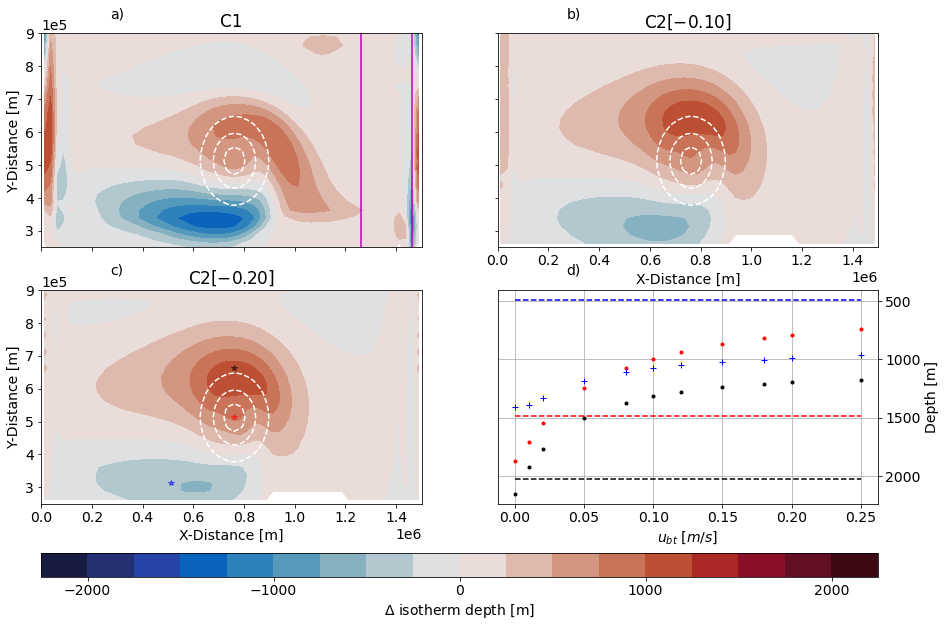

In [22]:
t=-1
t0=0

dmin=-2250
dmax=2250
dlev=19
dmap=cmo.balance
fig = plt.figure(figsize=(15,10))
gs = GridSpec(2,1, height_ratios=[1,0.05],wspace=.05)

gs1 = GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0])
gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])


ax = fig.add_subplot(gs1[0,0])
(dep475_b2t.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2t.isel(Temp=0,T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dep475_b2tu010.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu010.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xlabel('')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,0])
(dep475_b2tu020.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu020.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_xlim(0,1.5e6)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=26),marker='*',color='k',alpha=.5)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=20),marker='*',color='r',alpha=.5)
ax.plot(dsb2t.X.isel(X=20),dsb2t.Y.isel(Y=12),marker='*',color='b',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=26),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=20),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=14),0,1.5e6,color='k',alpha=.5)    
#ax.text(1.4e6,dsb2t.Y.isel(Y=26),'N')
#ax.text(1.4e6,dsb2t.Y.isel(Y=20),'C')
#ax.text(1.4e6,dsb2t.Y.isel(Y=14),'S')
ax.set_xlabel('X-Distance [m]')
ax.set_ylabel('Y-Distance [m]') 
ax.text(0.2, 1.09, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 

# have the lifting as comparison
ax = fig.add_subplot(gs1[1,1])
xx=30
yy=26
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='k',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='k',ls='--')
xx=30
yy=20
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='r',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='r',ls='--')
xx=20
yy=12
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='b',ls='',marker='+')
ax.hlines(di_t0, 0.0,0.25,color='b',ls='--')
ax.grid()
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$u_{bt}$ $[m/s]$')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.text(0.2, 1.09, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#colorabr

plt.colorbar(cb,cax=fig.add_subplot(gs2[0]), orientation="horizontal", ticks=np.linspace(-2000,2000,5),label="$\Delta$ isotherm depth [m]")

plt.tight_layout()
plt.savefig('figures/diso_diffruns_withoutGM.jpg',dpi=300)

In [23]:
n_lev=11
col = cmr.take_cmap_colors(cmo.speed, n_lev+2, return_fmt='hex')
col=col[2:]

In [24]:
dep475_b2t.isel(T=0,Temp=0,Y=20).values

array([1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550989,
       1486.84550989, 1486.84550989, 1486.84550989, 1486.84550

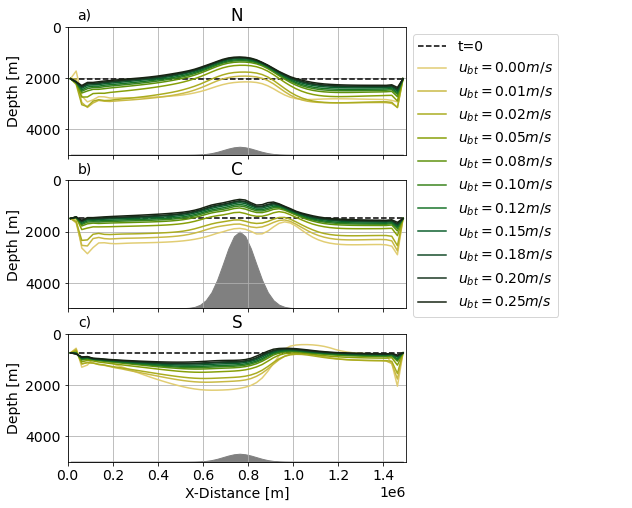

In [25]:
fig,axes=plt.subplots(3,2,figsize=(10,8),gridspec_kw={'width_ratios':[1,.5]})
i=0
for yy in [26,20,14]:
    ax=axes[i,0]
    dep475_b2tu001.isel(T=0,Temp=0,Y=yy).plot(color='k',linestyle='--',label='t=0',ax=ax)
    dep475_b2t.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.00m/s$',color=col[0],ax=ax)
    dep475_b2tu001.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.01m/s$',color=col[1],ax=ax)
    dep475_b2tu002.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.02m/s$',color=col[2],ax=ax)
    dep475_b2tu005.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.05m/s$',color=col[3],ax=ax)
    dep475_b2tu008.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.08m/s$',color=col[4],ax=ax)
    dep475_b2tu010.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.10m/s$',color=col[5],ax=ax)
    dep475_b2tu012.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.12m/s$',color=col[6],ax=ax)
    dep475_b2tu015.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.15m/s$',color=col[7],ax=ax)
    dep475_b2tu018.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.18m/s$',color=col[8],ax=ax)
    dep475_b2tu020.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.20m/s$',color=col[9],ax=ax)
    dep475_b2tu025.isel(T=-1,Temp=0,Y=yy).plot(label='$u_{bt}=0.25m/s$',color=col[10],ax=ax)
    ax.fill_between(dsb2t.X,(dsb2t.Depth).isel(Y=yy),5000,color='grey')
    ax.set_ylim(0,5000)
    ax.grid()
    ax.set_xlabel('')
    ax.set_xlim(0,1.5e6)
    ax.set_ylabel('Depth [m]')
    ax.invert_yaxis()
    i=i+1

axes[0,0].set_title('N')
axes[1,0].set_title('C')
axes[2,0].set_title('S')
axes[0,0].legend(bbox_to_anchor=[1.,1])
axes[0,0].set_xticklabels('')
axes[1,0].set_xticklabels('')
ax.set_xlabel('X-Distance [m]')
axes[0,1].axis('off')
axes[1,1].axis('off')
axes[2,1].axis('off')
axes[0,0].text(0.05, 1.09, 'a)', horizontalalignment='center',verticalalignment='center', transform=axes[0,0].transAxes) 
axes[1,0].text(0.05, 1.09, 'b)', horizontalalignment='center',verticalalignment='center', transform=axes[1,0].transAxes) 
axes[2,0].text(0.05, 1.09, 'c)', horizontalalignment='center',verticalalignment='center', transform=axes[2,0].transAxes) 

plt.savefig('figures/iso_section_withoutGM.jpg',dpi=300)

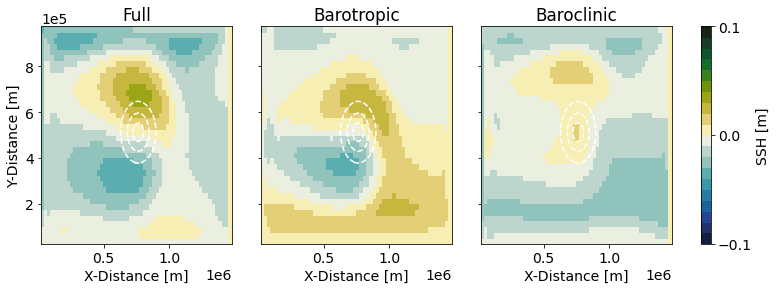

In [34]:
#compute difference in SSH by removing the thermal wind component from the full SSH
bt_comp=(dsb2tu002.Eta-dsb2t.Eta)
etamin=-0.10
etamax=0.10
etalev=21
etamap=cmo.delta
fig,axes=plt.subplots(1,4,figsize=(12,4),gridspec_kw={'width_ratios':[1,1,1,.05]})
ax=axes[0]
cb=(dsb2tu002.Eta-dsb2tu002.Eta.isel(X=58)).isel(X=slice(1,-1),Y=slice(1,-1),T=-1).plot.pcolormesh(ax=ax,vmin=etamin,vmax=etamax,levels=etalev,cmap=etamap,add_colorbar=False)
dsb2t.Depth.isel(X=slice(1,59),Y=slice(1,-1)).plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('Full')
ax.set_xlabel('X-Distance [m]')
ax.set_ylabel('Y-Distance [m]')
ax.ticklabel_format(axis='both', style='scientific', scilimits=[-4,4])#, useOffset=None, useLocale=None, useMathText=None)
ax=axes[1]
(bt_comp-bt_comp.isel(X=58)).isel(X=slice(1,-1),Y=slice(1,-1),T=-1).plot.pcolormesh(ax=ax,vmin=etamin,vmax=etamax,levels=etalev,cmap=etamap,add_colorbar=False)
dsb2t.Depth.isel(X=slice(1,59),Y=slice(1,-1)).plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('Barotropic')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlabel('X-Distance [m]')
ax=axes[2]
(dsb2t.Eta-dsb2t.Eta.isel(X=58)).isel(X=slice(1,-1),Y=slice(1,-1),T=-1).plot.pcolormesh(ax=ax,vmin=etamin,vmax=etamax,levels=etalev,cmap=etamap,add_colorbar=False)
dsb2t.Depth.isel(X=slice(1,59),Y=slice(1,-1)).plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('Baroclinic')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlabel('X-Distance [m]')

plt.colorbar(cb,cax=axes[3],label='SSH [m]',ticks=np.linspace(-0.2,0.2,5))
#plt.savefig('figures/20l_split_comp.jpg',dpi=300)

In [9]:
# changes in density

dsb2t['sigma0']=gsw.sigma0(dsb2t.S,dsb2t.Temp)
dsb2tu001['sigma0']=gsw.sigma0(dsb2tu001.S,dsb2tu001.Temp)
dsb2tu002['sigma0']=gsw.sigma0(dsb2tu002.S,dsb2tu002.Temp)
dsb2tu005['sigma0']=gsw.sigma0(dsb2tu005.S,dsb2tu005.Temp)
dsb2tu008['sigma0']=gsw.sigma0(dsb2tu008.S,dsb2tu008.Temp)
dsb2tu010['sigma0']=gsw.sigma0(dsb2tu010.S,dsb2tu010.Temp)
dsb2tu012['sigma0']=gsw.sigma0(dsb2tu012.S,dsb2tu012.Temp)
dsb2tu015['sigma0']=gsw.sigma0(dsb2tu015.S,dsb2tu015.Temp)
dsb2tu018['sigma0']=gsw.sigma0(dsb2tu018.S,dsb2tu018.Temp)
dsb2tu020['sigma0']=gsw.sigma0(dsb2tu020.S,dsb2tu020.Temp)
dsb2tu025['sigma0']=gsw.sigma0(dsb2tu025.S,dsb2tu025.Temp)

print(dsb2t.Z.isel(Z=1).values)
print(dsb2t.Z.isel(Z=10).values)


75.0
525.0


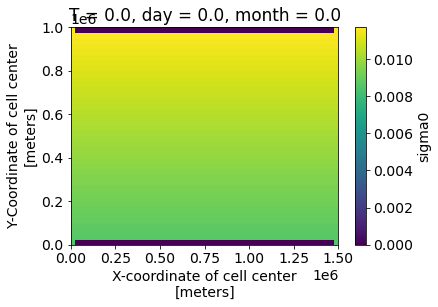

In [10]:
# difference in sigma between 525 m and 25
dsig_b2t=dsb2t.sigma0.isel(Z=10)-dsb2t.sigma0.isel(Z=1)
dsig_b2tu001=dsb2tu001.sigma0.isel(Z=10)-dsb2tu001.sigma0.isel(Z=1)
dsig_b2tu002=dsb2tu002.sigma0.isel(Z=10)-dsb2tu002.sigma0.isel(Z=1)
dsig_b2tu005=dsb2tu005.sigma0.isel(Z=10)-dsb2tu005.sigma0.isel(Z=1)
dsig_b2tu008=dsb2tu008.sigma0.isel(Z=10)-dsb2tu008.sigma0.isel(Z=1)
dsig_b2tu010=dsb2tu010.sigma0.isel(Z=10)-dsb2tu010.sigma0.isel(Z=1)
dsig_b2tu012=dsb2tu012.sigma0.isel(Z=10)-dsb2tu012.sigma0.isel(Z=1)
dsig_b2tu015=dsb2tu015.sigma0.isel(Z=10)-dsb2tu015.sigma0.isel(Z=1)
dsig_b2tu018=dsb2tu018.sigma0.isel(Z=10)-dsb2tu018.sigma0.isel(Z=1)
dsig_b2tu020=dsb2tu020.sigma0.isel(Z=10)-dsb2tu020.sigma0.isel(Z=1)
dsig_b2tu025=dsb2tu025.sigma0.isel(Z=10)-dsb2tu025.sigma0.isel(Z=1)
plt.figure()
dsig_b2tu025.isel(T=0).plot.pcolormesh()#vmin=0.006,vmax=0.015,levels=10)
plt.savefig('figures/dsig_t0_withoutGM.jpg',dpi=300)

<ipython-input-42-f5cb7a78297b>:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


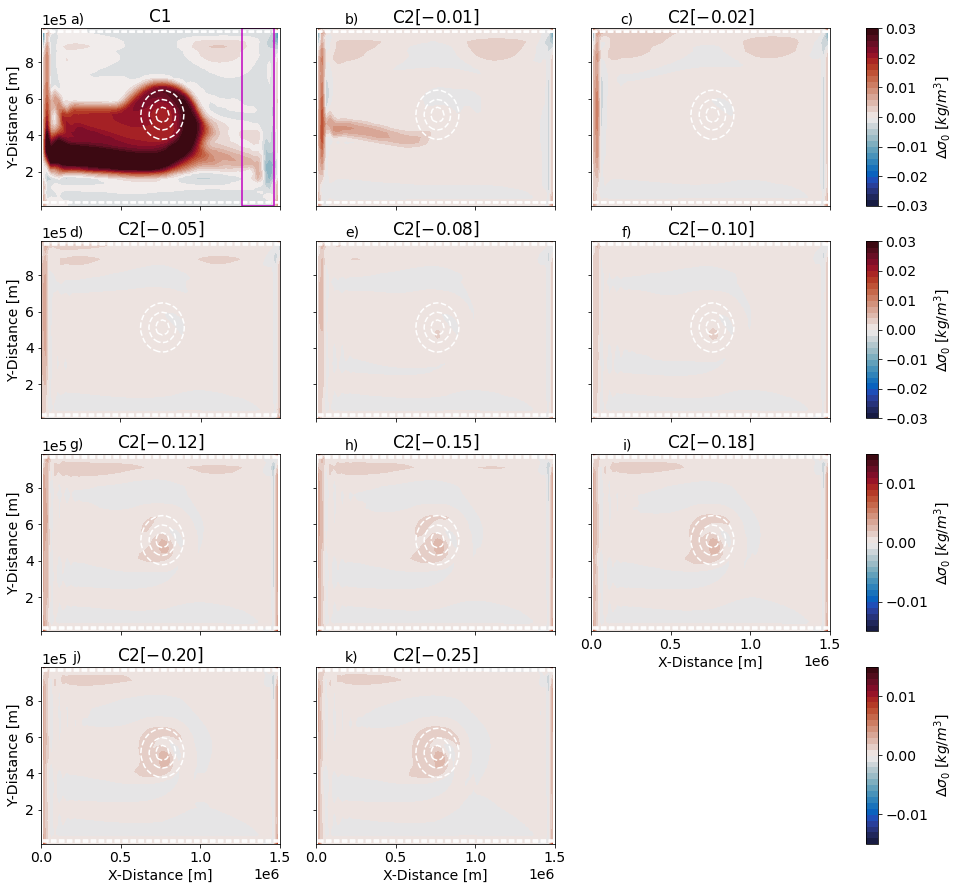

In [42]:
t=122
t0=0
dmin=-0.03
dmax=0.03
dlev=21
dmap=cmo.balance
fig = plt.figure(figsize=(15,15))
gs = GridSpec(1,1, height_ratios=[1],wspace=.05)

gs1 = GridSpecFromSubplotSpec(4,4, subplot_spec=gs[0],width_ratios=[1,1,1,0.05])
#gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])

# upper row has a different colorbar than the next one
dmin=-0.03
dmax=0.03
dlev=31
dmap=cmo.balance
ax = fig.add_subplot(gs1[0,0])
(dsig_b2t.isel(T=t)-dsig_b2t.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dsig_b2tu001.isel(T=t)-dsig_b2tu001.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.01]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,2])
cb1=(dsig_b2tu002.isel(T=t)-dsig_b2tu002.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.02]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.colorbar(cb1,cax=fig.add_subplot(gs1[0,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")

ax = fig.add_subplot(gs1[1,0])
cb2=(dsig_b2tu005.isel(T=t)-dsig_b2tu005.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.05]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.text(0.15, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,1])
(dsig_b2tu008.isel(T=t)-dsig_b2tu008.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.08]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,2])
(dsig_b2tu010.isel(T=t)-dsig_b2tu010.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.colorbar(cb2,cax=fig.add_subplot(gs1[1,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")

dmin=-0.015
dmax=0.015
dlev=31
ax = fig.add_subplot(gs1[2,0])
cb3=(dsig_b2tu012.isel(T=t)-dsig_b2tu012.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.12]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,1])
(dsig_b2tu015.isel(T=t)-dsig_b2tu015.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.15]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,2])
(dsig_b2tu018.isel(T=t)-dsig_b2tu018.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.18]$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'i)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.colorbar(cb3,cax=fig.add_subplot(gs1[2,3]),ticks=np.linspace(-0.01,0.01,3),label="$\Delta \\sigma_0$ [$kg/m^3$]")
#dmin=-0.01
#dmax=0.01
#dlev=21
ax = fig.add_subplot(gs1[3,0])
cb4=(dsig_b2tu020.isel(T=t)-dsig_b2tu020.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'j)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[3,1])
(dsig_b2tu025.isel(T=t)-dsig_b2tu025.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.25]$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'k)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 
plt.colorbar(cb4,cax=fig.add_subplot(gs1[3,3]), ticks=np.linspace(-0.01,0.01,3),label="$\Delta \\sigma_0$ [$kg/m^3$]")
plt.tight_layout()
plt.savefig('figures/dsig_dt_diffruns_withoutGM.jpg',dpi=300)

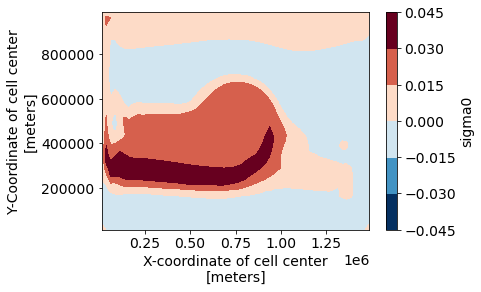

In [43]:
(dsig_b2t.isel(T=t)-dsig_b2t.isel(X=slice(50,59),T=0).mean(dim={'X'})).plot.contourf()

<ipython-input-44-fa4e8251d825>:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


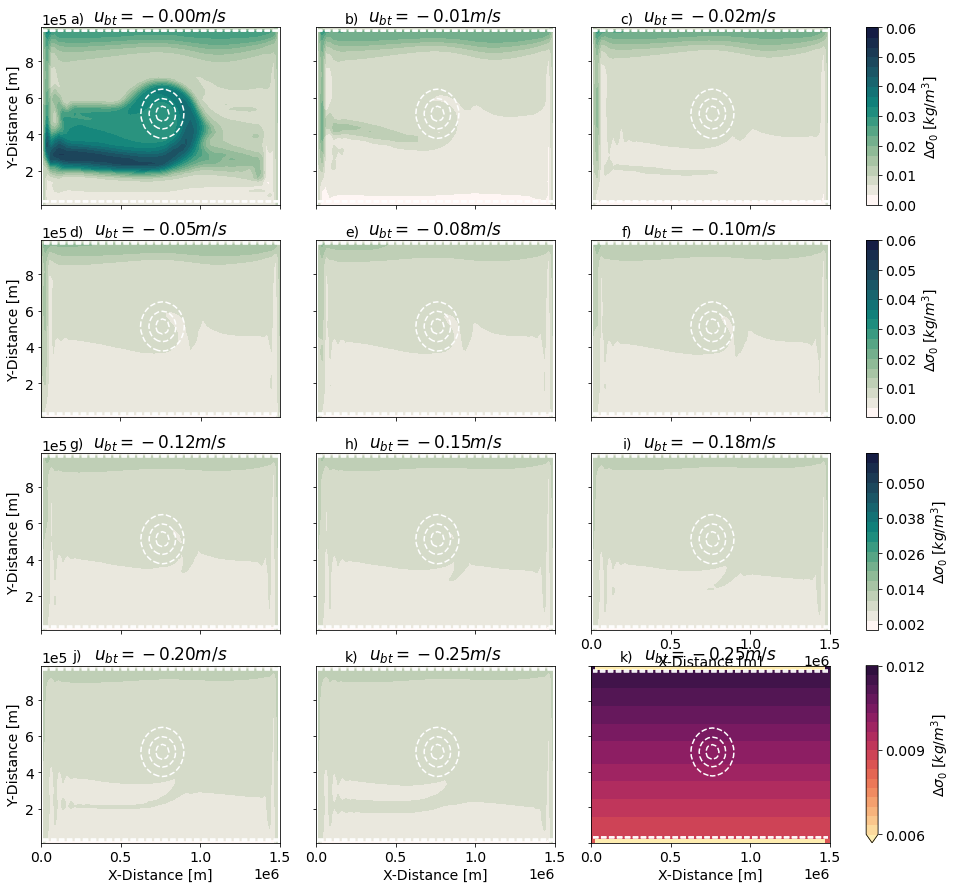

In [44]:
t=122
t0=0
dmin=0
dmax=0.06
dlev=19
dmap=cmo.tempo
fig = plt.figure(figsize=(15,15))
gs = GridSpec(1,1, height_ratios=[1],wspace=.05)

gs1 = GridSpecFromSubplotSpec(4,4, subplot_spec=gs[0],width_ratios=[1,1,1,0.05])
#gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])

# upper row has a different colorbar than the next one
ax = fig.add_subplot(gs1[0,0])
(dsig_b2t.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.00m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dsig_b2tu001.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.01m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,2])
cb1=(dsig_b2tu002.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.02m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.colorbar(cb1,cax=fig.add_subplot(gs1[0,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")

ax = fig.add_subplot(gs1[1,0])
cb2=(dsig_b2tu005.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.05m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.text(0.15, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,1])
(dsig_b2tu008.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.08m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,2])
(dsig_b2tu010.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.10m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.colorbar(cb2,cax=fig.add_subplot(gs1[1,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")
ax = fig.add_subplot(gs1[2,0])
cb3=(dsig_b2tu012.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.12m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,1])
(dsig_b2tu015.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.15m/s$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[2,2])
(dsig_b2tu018.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.18m/s$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'i)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.colorbar(cb3,cax=fig.add_subplot(gs1[2,3]),ticks=np.linspace(-0.01,0.05,6),label="$\Delta \\sigma_0$ [$kg/m^3$]")

ax = fig.add_subplot(gs1[3,0])
cb4=(dsig_b2tu020.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.20m/s$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'j)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[3,1])
(dsig_b2tu025.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.25m/s$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'k)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 

ax = fig.add_subplot(gs1[3,2])
cb4=(dsig_b2tu025.isel(T=0)).plot.pcolormesh(ax=ax,vmin=0.006,vmax=0.012,levels=19,cmap=cmo.matter,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('$u_{bt}=-0.25m/s$')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'k)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 
plt.colorbar(cb4,cax=fig.add_subplot(gs1[3,3]), ticks=np.linspace(0.006,0.012,3),label="$\Delta \\sigma_0$ [$kg/m^3$]")
plt.tight_layout()
plt.savefig('figures/dsig_diffruns_withoutGM.jpg',dpi=300)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


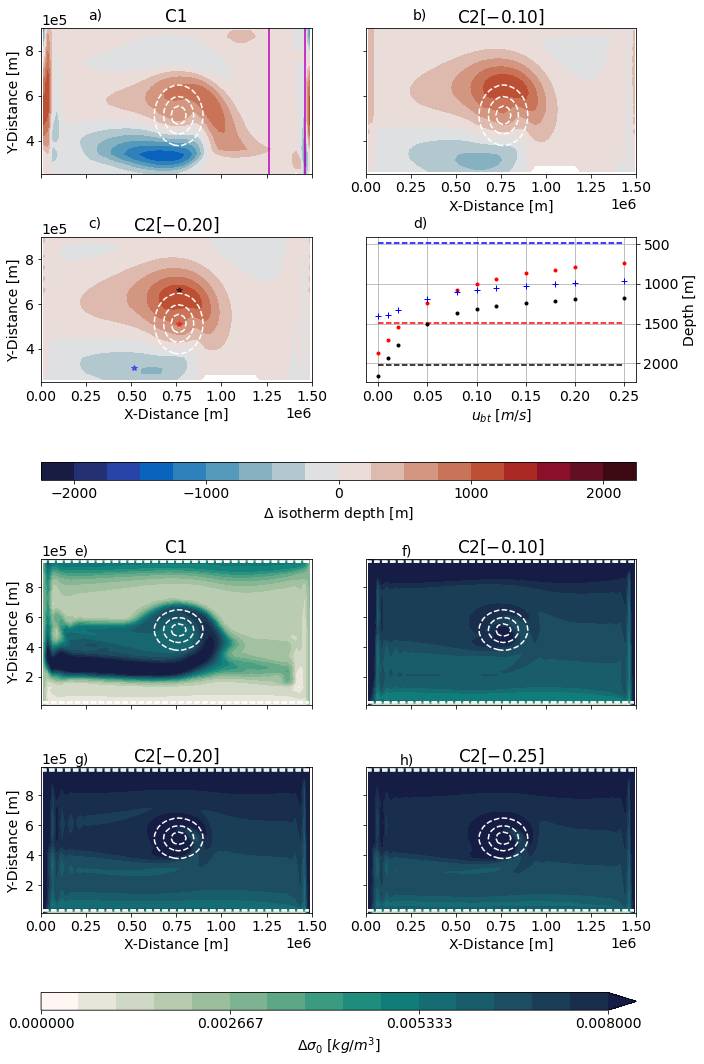

In [80]:
t=-1
t0=0

dmin=-2250
dmax=2250
dlev=19
dmap=cmo.balance
fig = plt.figure(figsize=(10,15))
gs = GridSpec(4,1, height_ratios=[1,0.05,1,0.05])#,wspace=.1)

gs1 = GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0])
gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])

gs3 = GridSpecFromSubplotSpec(2,2, subplot_spec=gs[2])
gs4 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[3], height_ratios=[1])


ax = fig.add_subplot(gs1[0,0])
cb=(dep475_b2t.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2t.isel(Temp=0,T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dep475_b2tu010.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu010.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xlabel('')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,0])
(dep475_b2tu020.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu020.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_xlim(0,1.5e6)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=26),marker='*',color='k',alpha=.5)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=20),marker='*',color='r',alpha=.5)
ax.plot(dsb2t.X.isel(X=20),dsb2t.Y.isel(Y=12),marker='*',color='b',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=26),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=20),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=14),0,1.5e6,color='k',alpha=.5)    
#ax.text(1.4e6,dsb2t.Y.isel(Y=26),'N')
#ax.text(1.4e6,dsb2t.Y.isel(Y=20),'C')
#ax.text(1.4e6,dsb2t.Y.isel(Y=14),'S')
ax.set_xlabel('X-Distance [m]')
ax.set_ylabel('Y-Distance [m]') 
ax.text(0.2, 1.09, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 

# have the lifting as comparison
ax = fig.add_subplot(gs1[1,1])
xx=30
yy=26
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='k',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='k',ls='--')
xx=30
yy=20
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='r',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='r',ls='--')
xx=20
yy=12
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='b',ls='',marker='+')
ax.hlines(di_t0, 0.0,0.25,color='b',ls='--')
ax.grid()
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$u_{bt}$ $[m/s]$')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.text(0.2, 1.09, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#colorabr

plt.colorbar(cb,cax=fig.add_subplot(gs2[0]), orientation="horizontal", ticks=np.linspace(-2000,2000,5),label="$\Delta$ isotherm depth [m]")



# add density changes
dmin=0
dmax=0.008
dlev=16
dmap=cmo.tempo


ax = fig.add_subplot(gs3[0,0])
(dsig_b2t.isel(T=t)).plot.contourf(ax=ax,vmin=dmin*5,vmax=dmax*5,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


ax = fig.add_subplot(gs3[0,1])
cb2=(dsig_b2tu010.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#plt.colorbar(cb2,cax=fig.add_subplot(gs1[1,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")


ax = fig.add_subplot(gs3[1,0])
(dsig_b2tu020.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
#ax.set_xticklabels('')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


ax = fig.add_subplot(gs3[1,1])
(dsig_b2tu025.isel(T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.25]$')
#ax.set_xticklabels('')
ax.set_ylabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_xlabel('X-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
 
plt.colorbar(cb2,cax=fig.add_subplot(gs4[0]),ticks=np.linspace(dmin,dmax,4),label="$\Delta \\sigma_0$ [$kg/m^3$]",orientation="horizontal")


plt.tight_layout()
plt.savefig('figures/diso_sig_runs_withoutGM.jpg',dpi=300)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


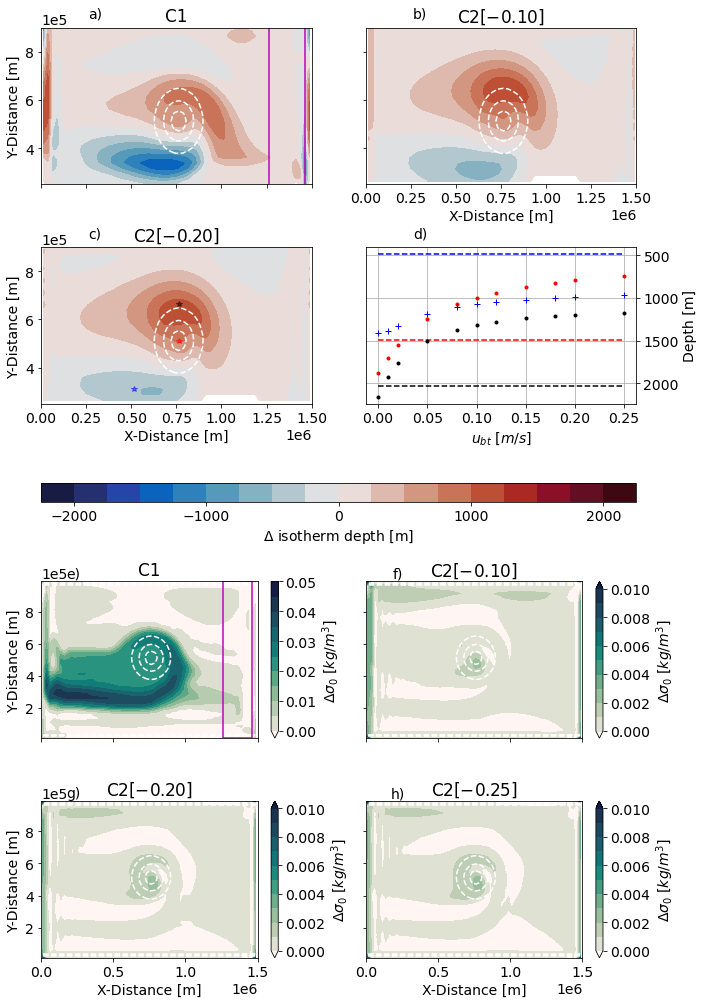

In [13]:
t=-1
t0=0

dmin=-2250
dmax=2250
dlev=19
dmap=cmo.balance
fig = plt.figure(figsize=(10,15))
gs = GridSpec(4,1, height_ratios=[1,0.05,1,0.05])#,wspace=.1)

gs1 = GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0])
gs2 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], height_ratios=[1])

gs3 = GridSpecFromSubplotSpec(2,2, subplot_spec=gs[2])
gs4 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[3], height_ratios=[1])


ax = fig.add_subplot(gs1[0,0])
cb=(dep475_b2t.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2t.isel(Temp=0,T=t)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C1')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[0,1])
(dep475_b2tu010.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu010.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xlabel('')
ax.set_xlabel('X-Distance [m]')
ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.2, 1.09, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs1[1,0])
(dep475_b2tu020.isel(Temp=0,X=slice(50,59)).mean(dim={'T','X'})-dep475_b2tu020.isel(T=t,Temp=0)).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_xlim(0,1.5e6)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=26),marker='*',color='k',alpha=.5)
ax.plot(dsb2t.X.isel(X=30),dsb2t.Y.isel(Y=20),marker='*',color='r',alpha=.5)
ax.plot(dsb2t.X.isel(X=20),dsb2t.Y.isel(Y=12),marker='*',color='b',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=26),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=20),0,1.5e6,color='k',alpha=.5)
#ax.hlines(dsb2t.Y.isel(Y=14),0,1.5e6,color='k',alpha=.5)    
#ax.text(1.4e6,dsb2t.Y.isel(Y=26),'N')
#ax.text(1.4e6,dsb2t.Y.isel(Y=20),'C')
#ax.text(1.4e6,dsb2t.Y.isel(Y=14),'S')
ax.set_xlabel('X-Distance [m]')
ax.set_ylabel('Y-Distance [m]') 
ax.text(0.2, 1.09, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes) 

# have the lifting as comparison
ax = fig.add_subplot(gs1[1,1])
xx=30
yy=26
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='k',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='k',ls='--')
xx=30
yy=20
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='r',ls='',marker='.')
ax.hlines(di_t0, 0.0,0.25,color='r',ls='--')
xx=20
yy=12
di_t0=dep475_b2t.isel(T=0,X=xx,Y=yy,Temp=0)
di_t=dep475_b2t.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu001=dep475_b2tu001.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu002=dep475_b2tu002.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu005=dep475_b2tu005.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu008=dep475_b2tu008.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu010=dep475_b2tu010.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu012=dep475_b2tu012.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu015=dep475_b2tu015.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu018=dep475_b2tu018.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu020=dep475_b2tu020.isel(T=-1,X=xx,Y=yy,Temp=0)
di_tu025=dep475_b2tu025.isel(T=-1,X=xx,Y=yy,Temp=0)

ax.plot([0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.15,0.18,0.2,0.25],
         [di_t,di_tu001,di_tu002,di_tu005,di_tu008,di_tu010,di_tu012,di_tu015,di_tu018,di_tu020,di_tu025],color='b',ls='',marker='+')
ax.hlines(di_t0, 0.0,0.25,color='b',ls='--')
ax.grid()
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('$u_{bt}$ $[m/s]$')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.text(0.2, 1.09, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#colorabr

plt.colorbar(cb,cax=fig.add_subplot(gs2[0]), orientation="horizontal", ticks=np.linspace(-2000,2000,5),label="$\Delta$ isotherm depth [m]")



# add density changes
dmin=0
dmax=0.01
dlev=11
dmap=cmo.tempo


ax = fig.add_subplot(gs3[0,0])
(dsig_b2t.isel(T=t)-dsig_b2t.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin*5,vmax=dmax*5,levels=dlev,cmap=dmap,cbar_kwargs={'label':'$\Delta \\sigma_0$ [$kg/m^3$]'})#,extend='max',add_colorbar=False))
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.hlines(dsb2t.Y.isel(Y=0),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.hlines(dsb2t.Y.isel(Y=39),dsb2t.X.isel(X=50),dsb2t.X.isel(X=58),color='m')
ax.vlines(dsb2t.X.isel(X=50),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.vlines(dsb2t.X.isel(X=58),dsb2t.Y.isel(Y=0),dsb2t.Y.isel(Y=39),color='m')
ax.set_title('C1')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


ax = fig.add_subplot(gs3[0,1])
cb2=(dsig_b2tu010.isel(T=t)-dsig_b2tu010.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,cbar_kwargs={'label':'$\Delta \\sigma_0$ [$kg/m^3$]'})#,extend='max',add_colorbar=False))#,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.10]$')
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
#plt.colorbar(cb2,cax=fig.add_subplot(gs1[1,3]),ticks=np.linspace(dmin,dmax,7),label="$\Delta \\sigma_0$ [$kg/m^3$]")


ax = fig.add_subplot(gs3[1,0])
(dsig_b2tu020.isel(T=t)-dsig_b2tu020.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,cbar_kwargs={'label':'$\Delta \\sigma_0$ [$kg/m^3$]'})#,extend='max',add_colorbar=False))#,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.20]$')
#ax.set_xticklabels('')
ax.set_xlabel('X-Distance [m]')
#ax.set_ylim(0.25e6,.9e6)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-4,4])
ax.set_ylabel('Y-Distance [m]') 
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


ax = fig.add_subplot(gs3[1,1])
(dsig_b2tu025.isel(T=t)-dsig_b2tu025.isel(X=slice(50,59)).mean(dim={'T','X'})).plot.contourf(ax=ax,vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,cbar_kwargs={'label':'$\Delta \\sigma_0$ [$kg/m^3$]'})#,extend='max',add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],ax=ax,linestyles='--',colors='w')
ax.set_title('C2$[-0.25]$')
#ax.set_xticklabels('')
ax.set_ylabel('')
#ax.set_ylim(0.25e6,.9e6)
ax.set_yticklabels('')
ax.set_xlabel('X-Distance [m]')
ax.set_xlim(0,1.5e6)
ax.text(0.15, 1.05, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
 
#plt.colorbar(cb2,cax=fig.add_subplot(gs4[0]),ticks=np.linspace(dmin,dmax,4),label="$\Delta \\sigma_0$ [$kg/m^3$]",orientation="horizontal")


plt.tight_layout()
plt.savefig('figures/diso_sig_runswithoutmean_withoutGM.jpg',dpi=300)

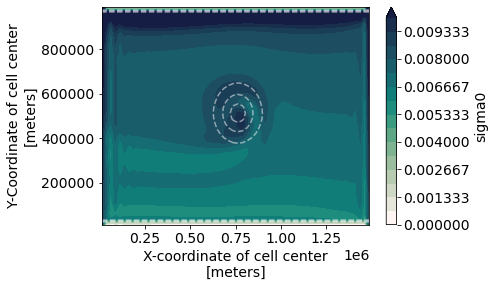

In [70]:
(dsig_b2tu025.isel(T=t)).plot.contourf(vmin=0,vmax=0.01,levels=16,cmap=dmap,extend='max')#,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],linestyles='--',colors='w',alpha=.5)



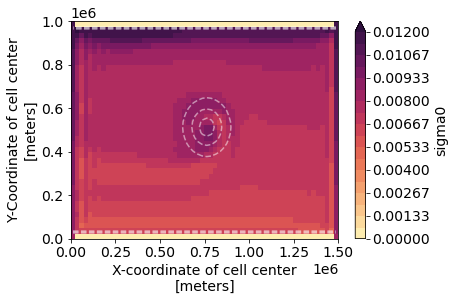

In [69]:

(dsig_b2tu025.isel(T=t)).plot.pcolormesh(vmin=0.00,vmax=0.012,levels=19,cmap=cmo.matter)#,add_colorbar=False)
dsb2t.Depth.plot.contour(levels=[2500,3500,4500],linestyles='--',colors='w',alpha=.5)